In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from scipy.stats import norm
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
#Use to import the file into google Colab drive
from google.colab import files 
#Use to import io, which opens the file from the Colab drive
import io

In [46]:
# This will open a widget when run that will enable you to browse the files on your local storage drive.
uploaded = files.upload()

Saving inputdata.csv to inputdata (3).csv


In [0]:
# Now use the below code to read the csv in pandas' dataframe
df = pd.read_csv(io.StringIO(uploaded['inputdata.csv'].decode('utf-8')))

In [62]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [72]:
df0=df.drop('EmployeeCount',axis='columns')
df1=df0.drop('EmployeeNumber',axis='columns')
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [73]:
df2 = pd.get_dummies(df1,drop_first=True)
df2.shape
print(df2.describe())
df2

               Age    DailyRate  ...  MaritalStatus_Single  OverTime_Yes
count  1470.000000  1470.000000  ...           1470.000000   1470.000000
mean     36.923810   802.485714  ...              0.319728      0.282993
std       9.135373   403.509100  ...              0.466530      0.450606
min      18.000000   102.000000  ...              0.000000      0.000000
25%      30.000000   465.000000  ...              0.000000      0.000000
50%      36.000000   802.000000  ...              0.000000      0.000000
75%      43.000000  1157.000000  ...              1.000000      1.000000
max      60.000000  1499.000000  ...              1.000000      1.000000

[8 rows x 46 columns]


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


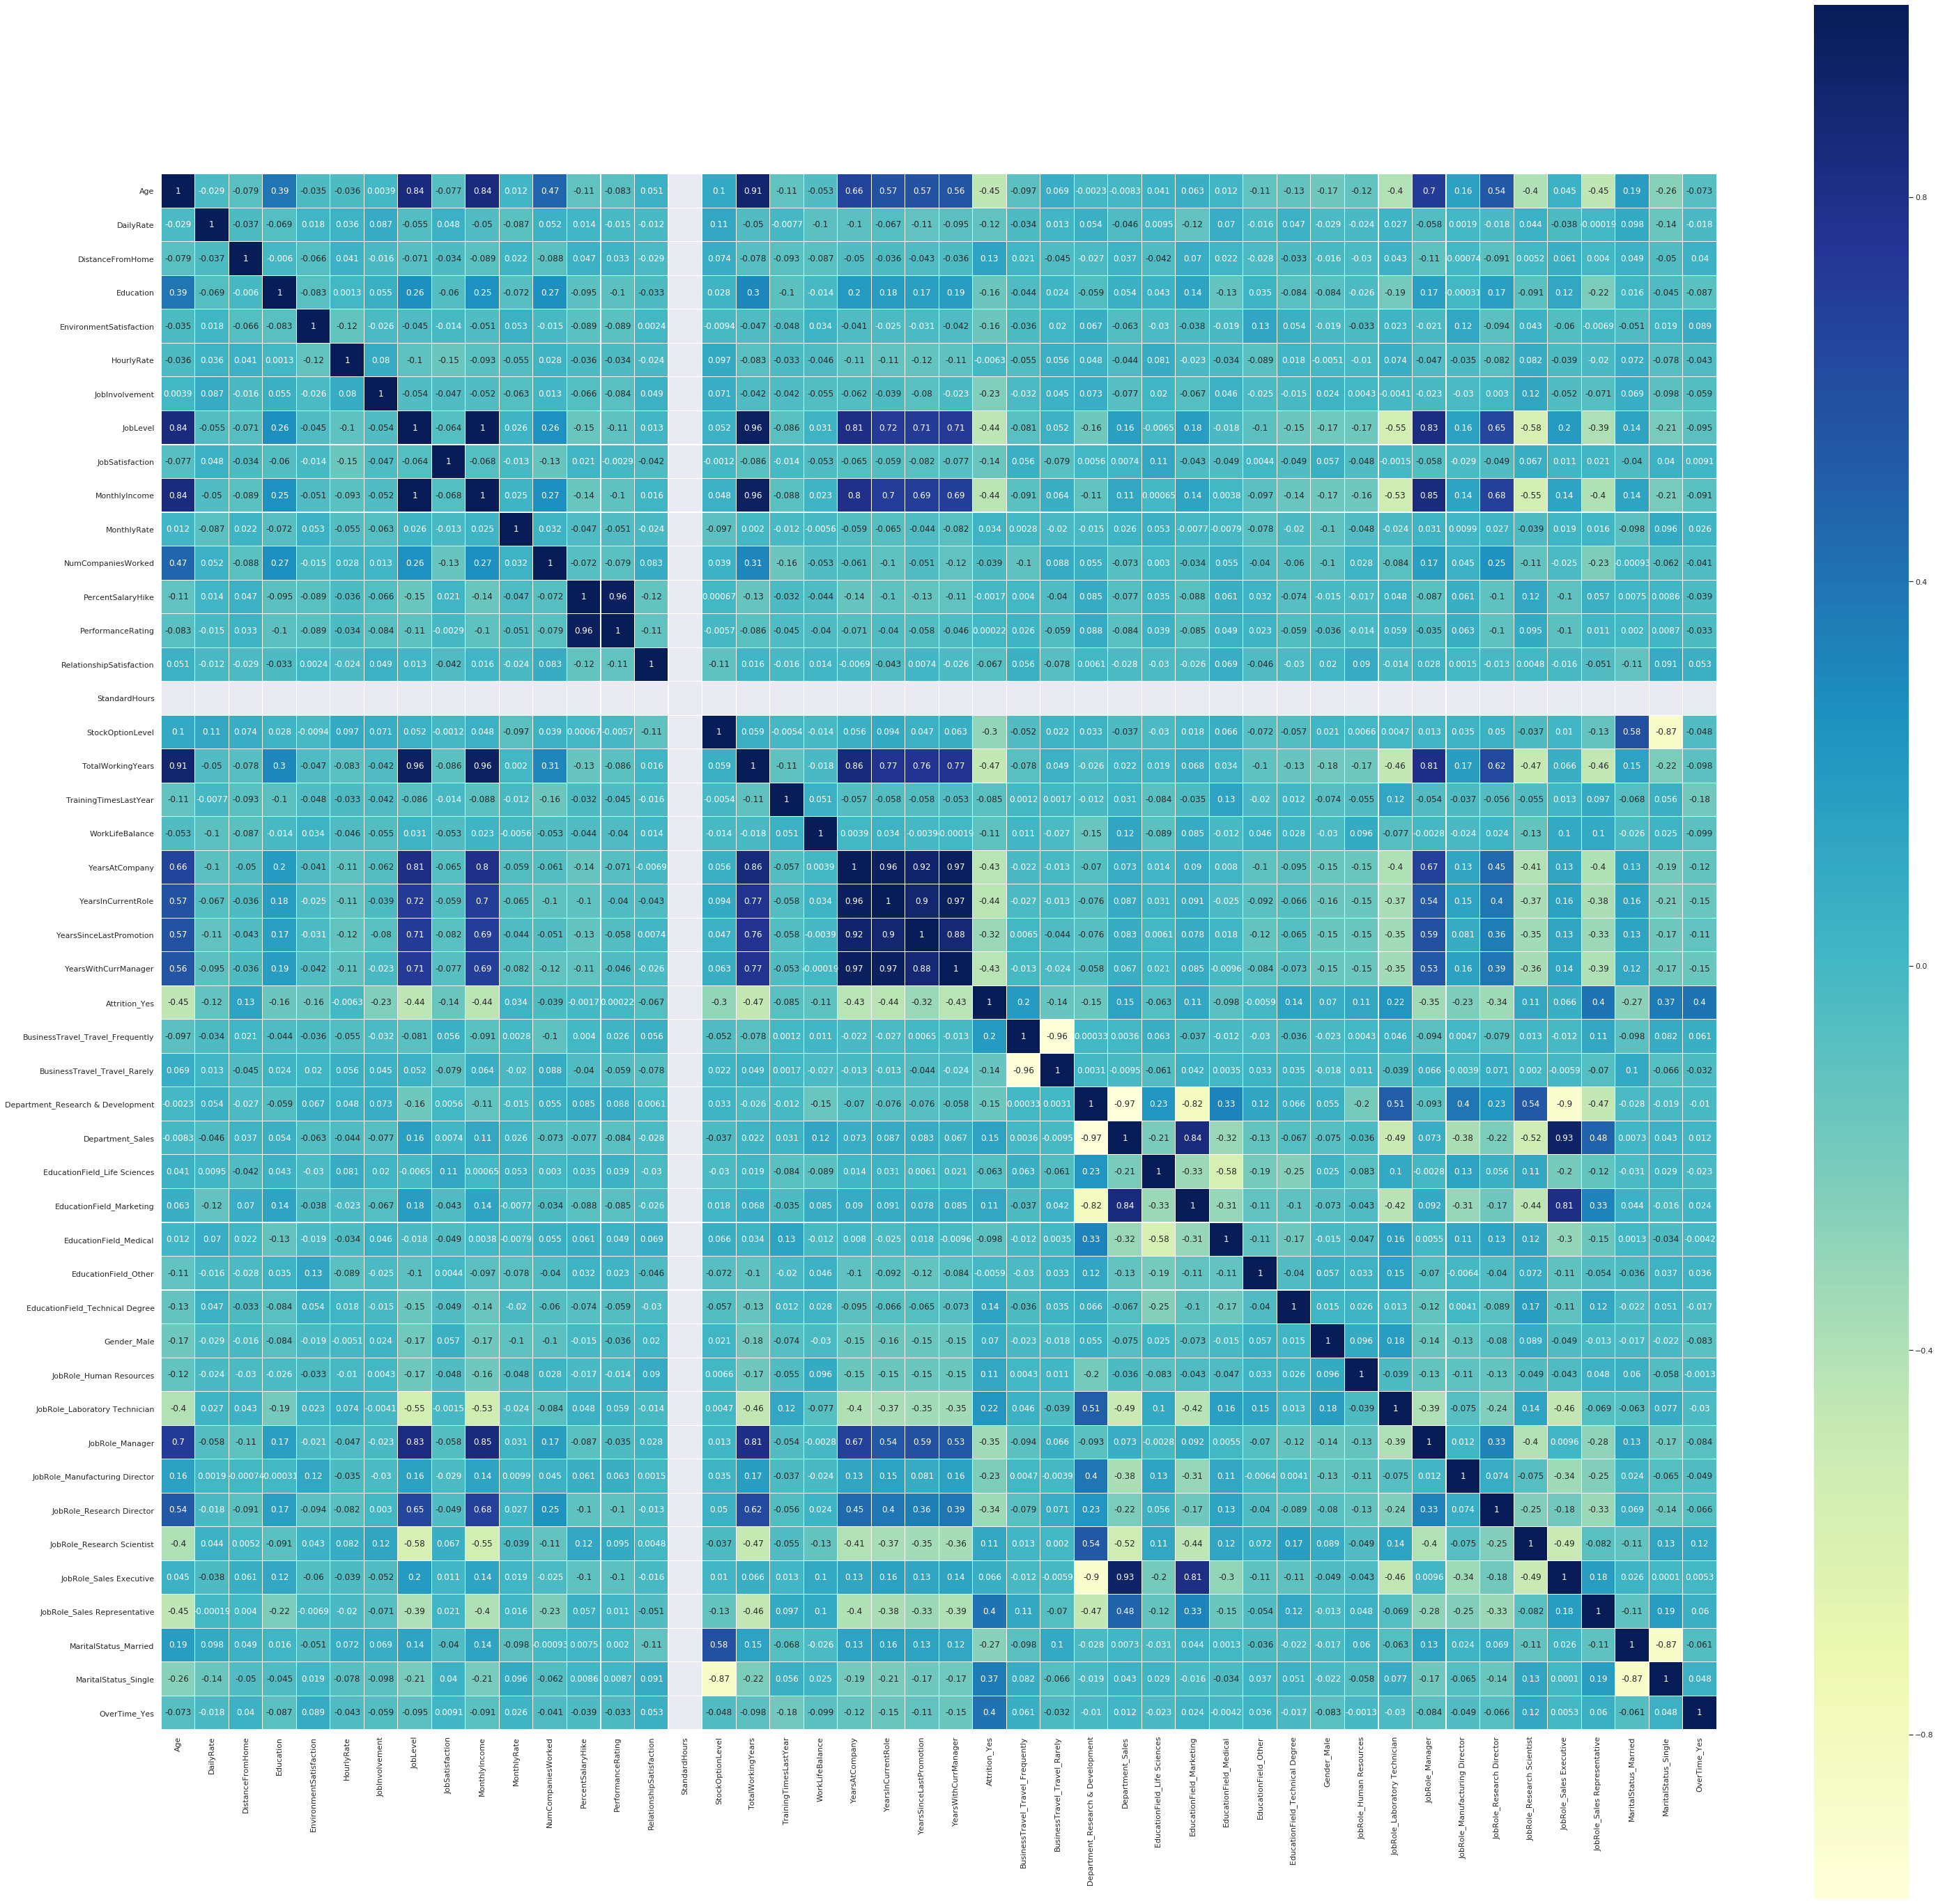

In [74]:
#Primary Analysis
corrmat = df2.corr() 
  
f, ax = plt.subplots(figsize =(50, 50)) 
sns.heatmap(corrmat.astype(float).corr(),linewidths=0.1, vmax=1.0,square=True,  ax = ax, cmap ="YlGnBu", linecolor='white', annot=True)


In [75]:
#dont run this
box_plot_data=[df2.Attrition_Yes]
plt.boxplot(box_plot_data,notch='True',patch_artist=True,labels=[df2.columns])
plt.show()

ValueError: ignored

<Figure size 2160x2160 with 1 Axes>

In [0]:
#dont run this
sns.pairplot(df2, hue='Attrition_Yes', palette = 'seismic',size=1.2, diag_kind = 'kde')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fee59a6a620> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
X=df2.drop('Attrition_Yes',axis='columns')
y=df2.Attrition_Yes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

No handles with labels found to put in legend.


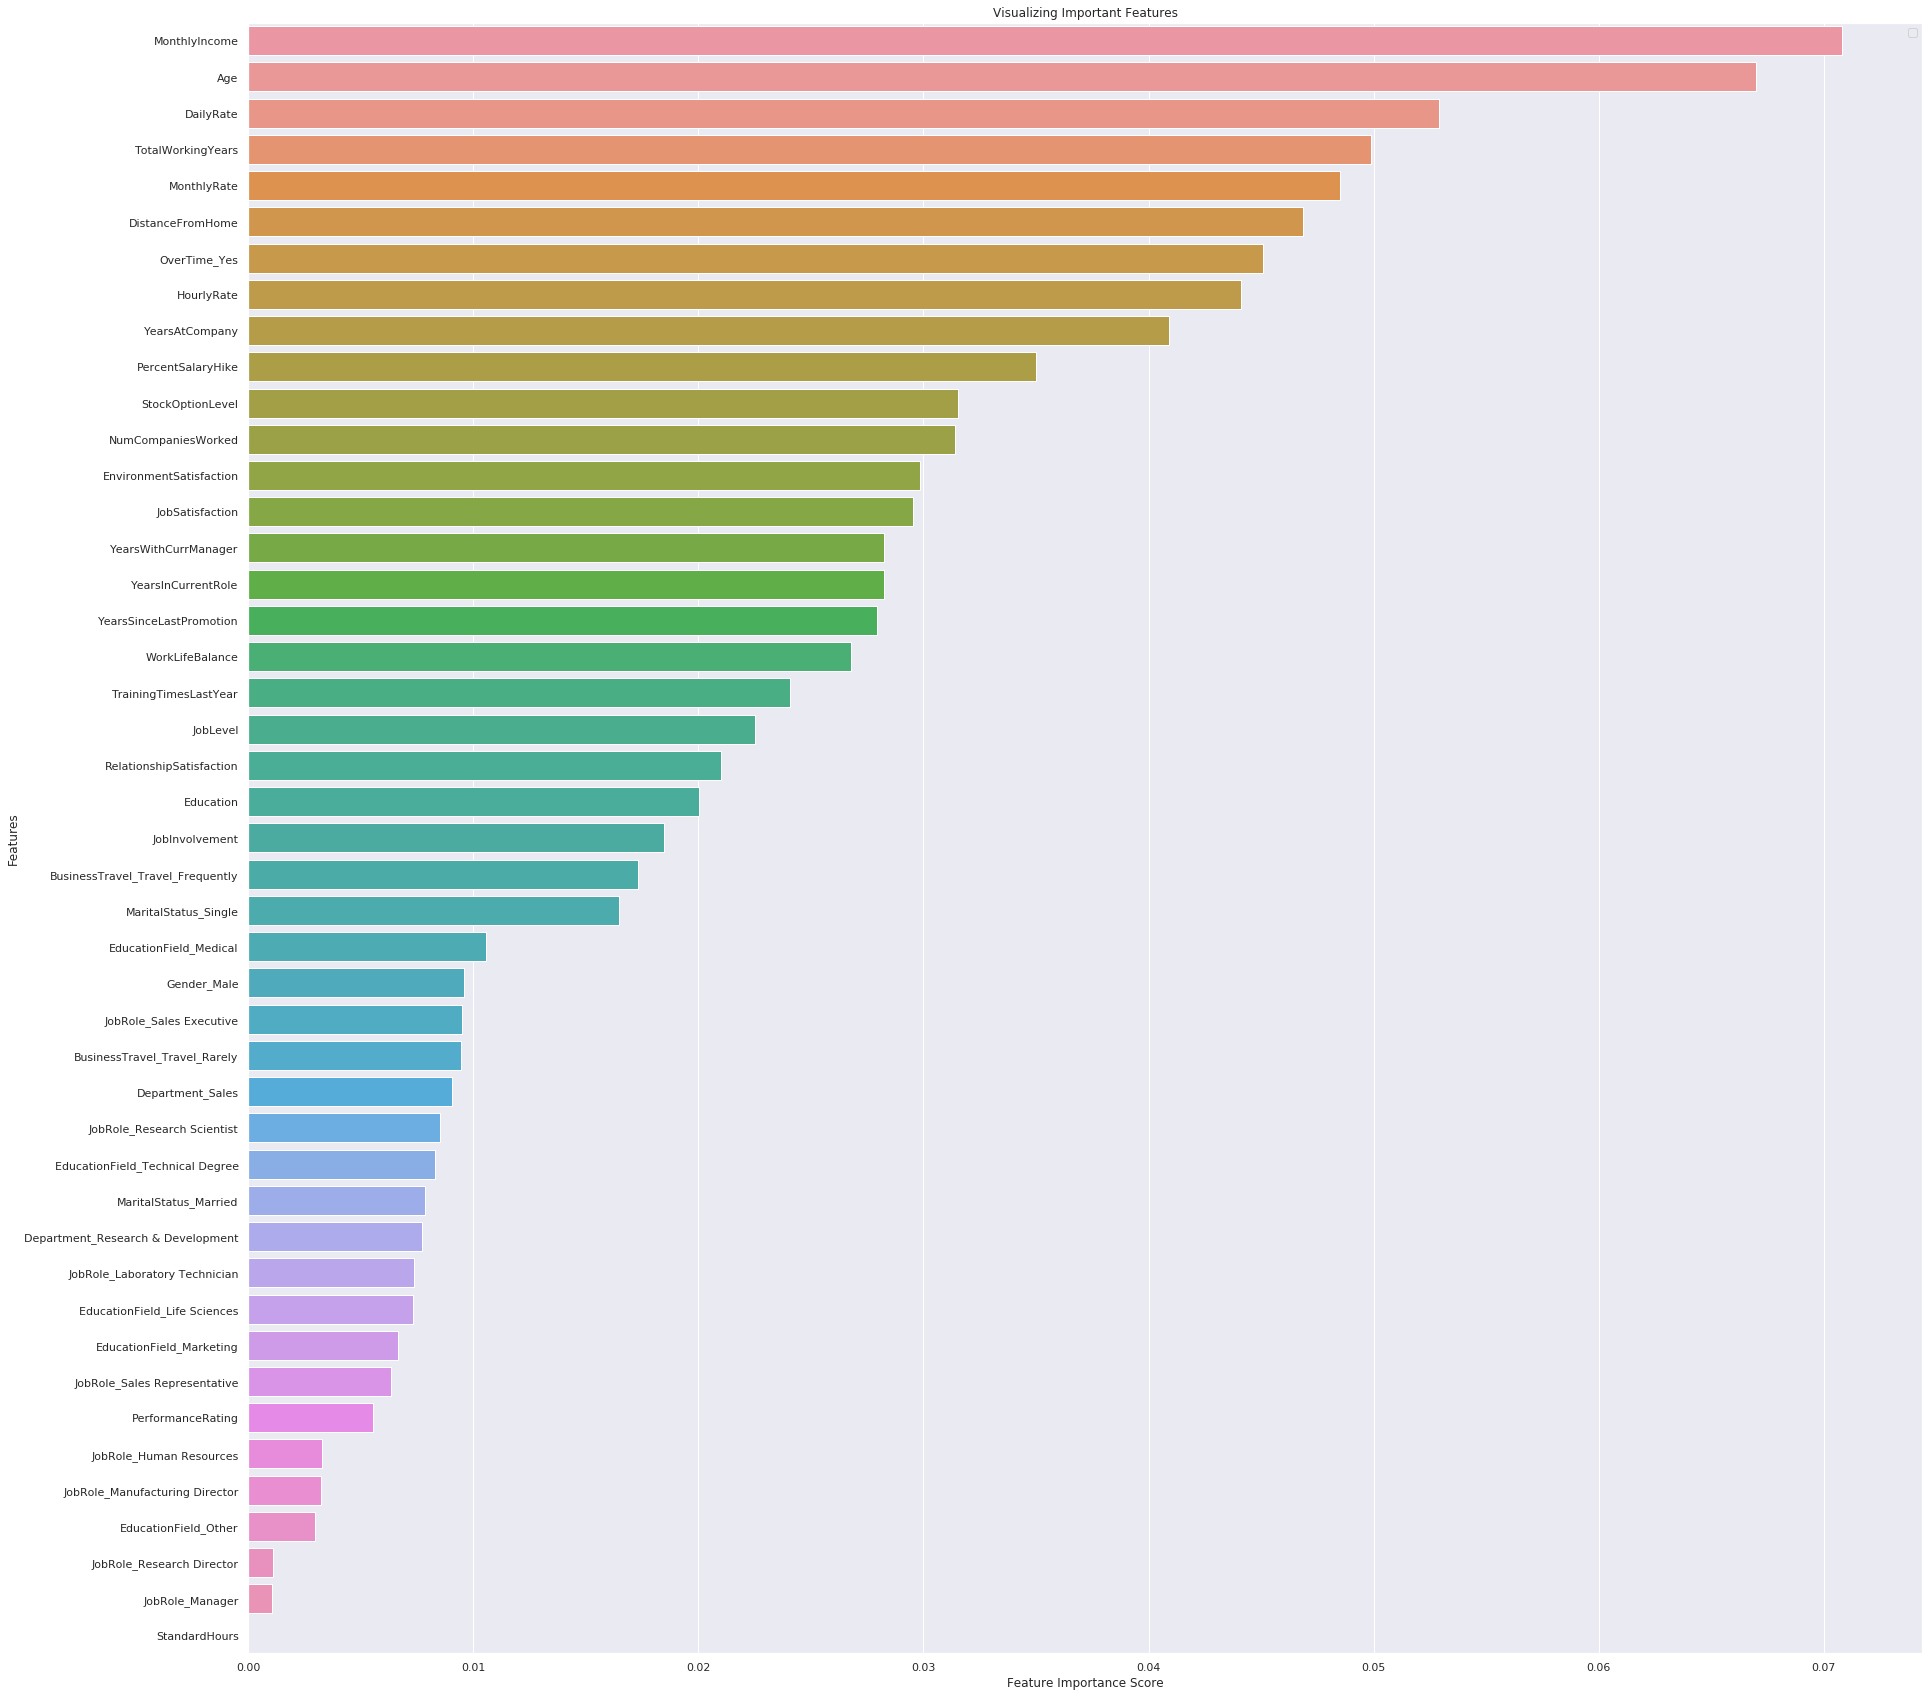

In [77]:
#finding important features using random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index )
sns.set(rc={'figure.figsize':(30,30)})
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [78]:
#linear Regression
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
reg.score(X_test,y_test)

                   Specs         Score
9          MonthlyIncome  92628.735684
10           MonthlyRate   7623.501221
1              DailyRate   1111.255336
17     TotalWorkingYears    194.333874
20        YearsAtCompany    113.659730
21    YearsInCurrentRole     81.740865
0                    Age     73.908211
23  YearsWithCurrManager     69.828132
2       DistanceFromHome     45.071969
44          OverTime_Yes     41.692612


In [79]:
#Logistic Regression with solver as liblinear and penalty as l1 and C as 10.0
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

confusion matrix: [[353  18]
 [ 36  34]]
Accuracy Score : 0.8775510204081632
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       371
           1       0.65      0.49      0.56        70

    accuracy                           0.88       441
   macro avg       0.78      0.72      0.74       441
weighted avg       0.87      0.88      0.87       441

                   Specs         Score
9          MonthlyIncome  92628.735684
10           MonthlyRate   7623.501221
1              DailyRate   1111.255336
17     TotalWorkingYears    194.333874
20        YearsAtCompany    113.659730
21    YearsInCurrentRole     81.740865
0                    Age     73.908211
23  YearsWithCurrManager     69.828132
2       DistanceFromHome     45.071969
44          OverTime_Yes     41.692612


In [70]:
#Logistic Regression with solver as liblinear and penalty as l2 and C as 10
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

coeff_used = np.sum(lasso.coef_!=0)
coeff_used
print ("number of features used: ", coeff_used)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'Score'))  #print 10 best features

confusion matrix: [[361   5]
 [ 49  26]]
Accuracy Score : 0.8775510204081632
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       366
           1       0.84      0.35      0.49        75

    accuracy                           0.88       441
   macro avg       0.86      0.67      0.71       441
weighted avg       0.87      0.88      0.86       441

number of features used:  3
             Specs         Score
10   MonthlyIncome  76058.963506
4   EmployeeNumber    522.157185
11     MonthlyRate    365.378685


In [0]:
#Logistic Regression with solver as lbfgs
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

confusion matrix: [[376   0]
 [ 65   0]]
Accuracy Score : 0.8526077097505669
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       376
           1       0.00      0.00      0.00        65

    accuracy                           0.85       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.73      0.85      0.78       441



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Lasso Regression with alpha=1
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
lasso.fit(X_train,y_train)
y_pred = model.predict(X_test)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
coeff_used
print ("number of features used: ", coeff_used)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

training score: 0.022919358252350364
test score:  0.036815299145517066
number of features used:  3
confusion matrix: [[376   0]
 [ 65   0]]
Accuracy Score : 0.8526077097505669
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       376
           1       0.00      0.00      0.00        65

    accuracy                           0.85       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.73      0.85      0.78       441



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) #  comparison with alpha value
ridge.fit(X_train, y_train)
ridge.score(X_test,y_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

confusion matrix: [[376   0]
 [ 65   0]]
Accuracy Score : 0.8526077097505669
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       376
           1       0.00      0.00      0.00        65

    accuracy                           0.85       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.73      0.85      0.78       441



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Random Forest Classifier
y_pred=clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.873015873015873

In [0]:
#Gradient Boosting (not classfier)
regressor_Default = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
regressor_Default.fit(X_train, y_train)
y_pred = regressor_Default.predict(X_test)
regressor_Default.score(X_test,y_test)

0.2628277626049511

In [0]:
#Decision Tree
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

confusion matrix: [[323  53]
 [ 41  24]]
Accuracy Score : 0.7868480725623582
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       376
           1       0.31      0.37      0.34        65

    accuracy                           0.79       441
   macro avg       0.60      0.61      0.61       441
weighted avg       0.80      0.79      0.79       441



In [0]:
#SVM
from sklearn.svm import SVC
model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

confusion matrix: [[376   0]
 [ 65   0]]
Accuracy Score : 0.8526077097505669
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       376
           1       0.00      0.00      0.00        65

    accuracy                           0.85       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.73      0.85      0.78       441



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#do not run
from sklearn import svm
from sklearn.model_selection import cross_val_score
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),X_test, y_test, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

In [0]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X_train, y_train)
clf.cv_results_

In [0]:
df = pd.DataFrame(clf.cv_results_)
df

In [0]:
df[['param_C','param_kernel','mean_test_score']]

In [0]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X_train, y_train)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

In [0]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [0]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

KeyboardInterrupt: ignored

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.833
Accuracy score (validation): 0.853
Learning rate:  0.075
Accuracy score (training): 0.834
Accuracy score (validation): 0.853
Learning rate:  0.1
Accuracy score (training): 0.836
Accuracy score (validation): 0.853
Learning rate:  0.25
Accuracy score (training): 0.858
Accuracy score (validation): 0.862
Learning rate:  0.5
Accuracy score (training): 0.882
Accuracy score (validation): 0.866
Learning rate:  0.75
Accuracy score (training): 0.886
Accuracy score (validation): 0.875
Learning rate:  1
Accuracy score (training): 0.891
Accuracy score (validation): 0.848


In [0]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("model score:", score)
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[370   6]
 [ 53  12]]
model score: 0.8775510204081632
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       376
           1       0.67      0.18      0.29        65

    accuracy                           0.87       441
   macro avg       0.77      0.58      0.61       441
weighted avg       0.84      0.87      0.83       441



In [0]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
print("model score:", score)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

model score: 0.8775510204081632
confusion matrix: [[321  55]
 [ 26  39]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       376
           1       0.41      0.60      0.49        65

    accuracy                           0.82       441
   macro avg       0.67      0.73      0.69       441
weighted avg       0.85      0.82      0.83       441



In [0]:
#validating the Naive Bayes result
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.74879227, 0.79710145, 0.84390244, 0.75121951, 0.7902439 ])

In [0]:
#XGBoost Classifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))
print("model score:", score)
cross_val_score(XGBClassifier(),X_train, y_train, cv=5)

confusion matrix: [[321  55]
 [ 26  39]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       376
           1       0.41      0.60      0.49        65

    accuracy                           0.82       441
   macro avg       0.67      0.73      0.69       441
weighted avg       0.85      0.82      0.83       441

model score: 0.8775510204081632


array([0.84057971, 0.85990338, 0.87317073, 0.85365854, 0.83902439])